# Myntra Fashion Product Analysis
    by
    Name:- PRIYANSHU YADAV
    Sec :- 'F'
    Rolln :- 23071003505

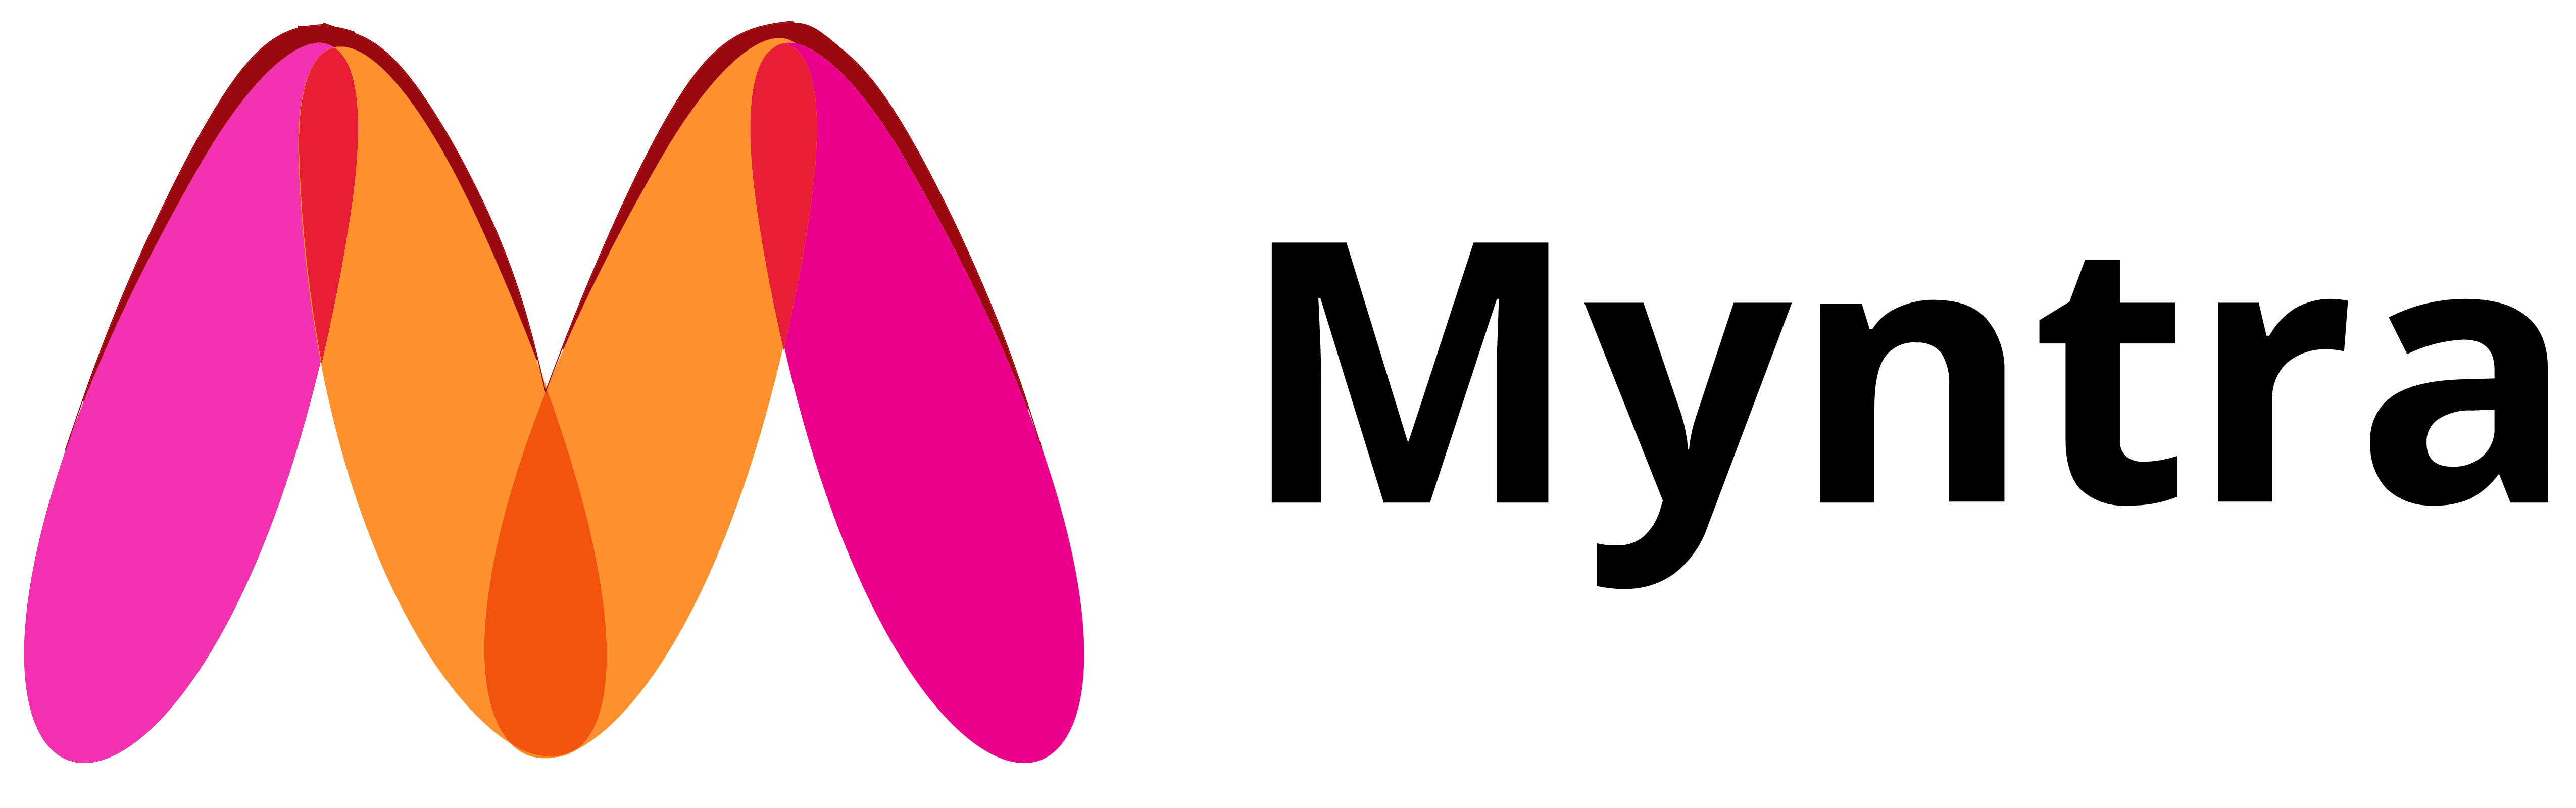

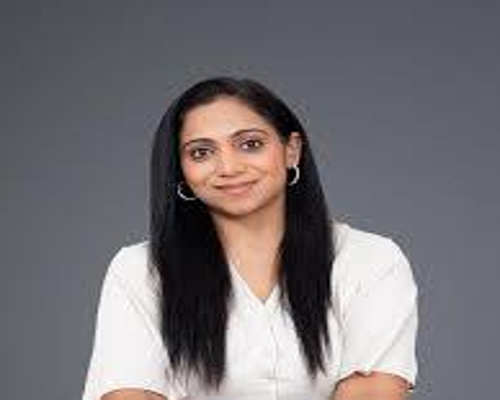

In [17]:
from PIL import Image as PILImage
from IPython.display import display

img = PILImage.open('images (1).jpg')
resized_img = img.resize((500, 400))
display(resized_img)

# CEO                       : Mrs. Nandita Sinha

#### About Myntra :
#### Company Ethos   : A Fashion & Lifestyle Company
#### Parent Company  : Flipkart-Walmart
#### Products : 5L+
#### Brands    : 5000+
#### Sellers    : 2000+
#### Return policy : 15 days
#### App store download : 50M+
#### App store rating : 4.4

### Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import requests

### Importing Dataset

In [19]:
df=pd.read_csv('Myntra_products.csv')

Let's have a look at the dataset

In [20]:
df.head(5)

,name,sku,mpn,price,in_stock,currency,brand,description,images,gender
0,DKNY Unisex Black & Grey Printed Medium Trolle...,10017413,10017413,11745,True,INR,DKNY,"Black and grey printed medium trolley bag, sec...",http://assets.myntassets.com/assets/images/100...,Unisex
1,EthnoVogue Women Beige & Grey Made to Measure ...,10016283,10016283,5810,True,INR,EthnoVogue,Beige & Grey made to measure kurta with churid...,http://assets.myntassets.com/assets/images/100...,Women
2,SPYKAR Women Pink Alexa Super Skinny Fit High-...,10009781,10009781,899,True,INR,SPYKAR,Pink coloured wash 5-pocket high-rise cropped ...,http://assets.myntassets.com/assets/images/100...,Women
3,Raymond Men Blue Self-Design Single-Breasted B...,10015921,10015921,5599,True,INR,Raymond,Blue self-design bandhgala suitBlue self-desig...,http://assets.myntassets.com/assets/images/pro...,Men
4,Parx Men Brown & Off-White Slim Fit Printed Ca...,10017833,10017833,759,True,INR,Parx,"Brown and off-white printed casual shirt, has ...",http://assets.myntassets.com/assets/images/pro...,Men


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         12491 non-null  object
 1   sku          12491 non-null  int64 
 2   mpn          12491 non-null  int64 
 3   price        12491 non-null  int64 
 4   in_stock     12491 non-null  bool  
 5   currency     12491 non-null  object
 6   brand        12491 non-null  object
 7   description  12491 non-null  object
 8   images       12491 non-null  object
 9   gender       12491 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 890.6+ KB


Now we check if there is any null value present in our dataset

In [22]:
df.isnull().sum()

name           0
sku            0
mpn            0
price          0
in_stock       0
currency       0
brand          0
description    0
images         0
gender         0
dtype: int64

in_stock is the only column with null values. We can fill these null values with 'others'

In [23]:
#The NULL in brand is simply filled with 'Other'
df['in_stock'] = df['in_stock'].fillna('Other')

In [24]:
#Converting all strings in dataframe to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

C:\Users\py515\AppData\Local\Temp\ipykernel_26268\429108082.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s:s.lower() if type(s) == str else s)


In [25]:
#Removing leading spaces from PrimaryColor column
df['brand'] = df['brand'].str.lstrip()

Firstly we will checkout the various brands available

In [26]:
print("Various brands available: ",df.brand.unique())

Various brands available:  ['dkny' 'ethnovogue' 'spykar' 'raymond' 'parx' 'showoff' 'kenneth cole'
 'police' 'vishudh' 'being human' 'homesake' 'sej by nisha gupta'
 'yak yak' 'parfait' 'michael kors' 'highlander' 'jewel junction' 'id'
 'story@home' 'gini and jony' 'sera' 'accessher' 'alcis'
 'difference of opinion' 'tokyo talkies' 'anna sui' 'her by invictus'
 'soie' 'lara karen' 'urban dog' 'ahilya' 'vastramay' 'campus sutra'
 'fido dido' 'miah decor' 'buckleup' 'peter england' 'aigner' 'lady lyka'
 'park avenue' 'roadster' 'u.s. polo assn. denim co.' 'sweet dreams'
 'kazo' 'stylo bug' 'bvlgari' 'qraa men' 'gas' 'with' 'zush'
 'jbn creation' 'u.s. polo assn. kids' 'dressberry' 'colorplus' 'lakme'
 'allen solly woman' 'palm tree' 'arrow' 'david beckham' 'mango' 'carrera'
 'romee' 'tayhaa' 'ishin' 'shoe couture' 'harbornbay' 'keds' 'rozia'
 'aj dezines' 'monte carlo' 'even' 'ether' 'crimsoune club'
 'russell athletic' 'mimosa' 'puma' 'blackberrys' 'playdate' 'rocia'
 'marvel by wear yo

In [27]:
number_of_unique_brand= len(pd.unique(df['brand']))
number_of_unique_brand

677

Now let's checkout what are the diffrent types of categories in Gender column

In [28]:
print("Categories in Gender: ",df.gender.unique())

Categories in Gender:  ['unisex' 'women' 'men' 'boys' 'girls' 'unisex kids']


Next we will checkout the diffrent colour options available 

In [29]:
print("\n Categories in Name: ",df.name.unique())


 Categories in Name:  ['dkny unisex black & grey printed medium trolley bag'
 'ethnovogue women beige & grey made to measure custom made kurta set with jacket'
 'spykar women pink alexa super skinny fit high-rise clean look stretchable cropped jeans'
 ... '612 league girls navy blue & white printed regular fit denim shorts'
 'bvlgari men aqva pour homme marine eau de toilette 150ml'
 'pepe jeans men black & grey striped polo collar t-shirt']


Next let's checkout the price range available on myntra

In [30]:
print("max price : ",df['price'].max())
print("min price : ",df['price'].min())
print("mean price : ",df['price'].mean())

max price :  63090
min price :  90
mean price :  1452.6609558882396


# Data Visualisation

### Top 10 brands

<Axes: title={'center': 'Top 10 popular brands'}, xlabel='brand'>

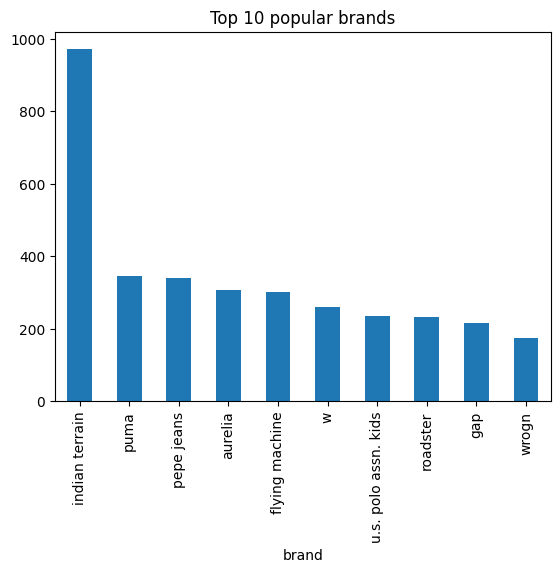

In [31]:
df.brand.value_counts()[:10].plot(kind= 'bar', title = 'Top 10 popular brands')

### Top 10 Expensive Brand

<Axes: xlabel='brand'>

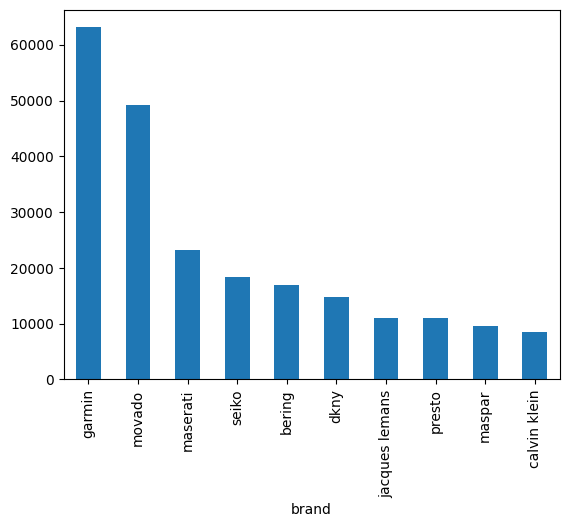

In [32]:
df1=df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
df1.plot.bar()

### Let's See products belong to which category according to gender

<Axes: ylabel='sku'>

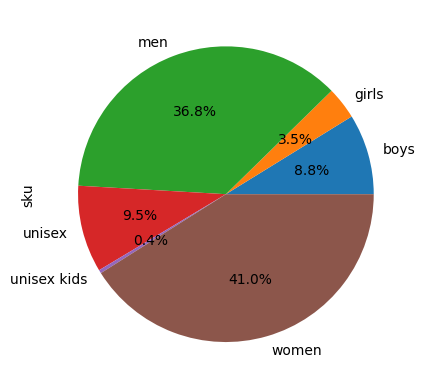

In [33]:
df.groupby('gender')['sku'].count().plot.pie(autopct="%1.1f%%")

The plot says that most of the products in the data are for women

### Most preferable color

<Axes: xlabel='gender'>

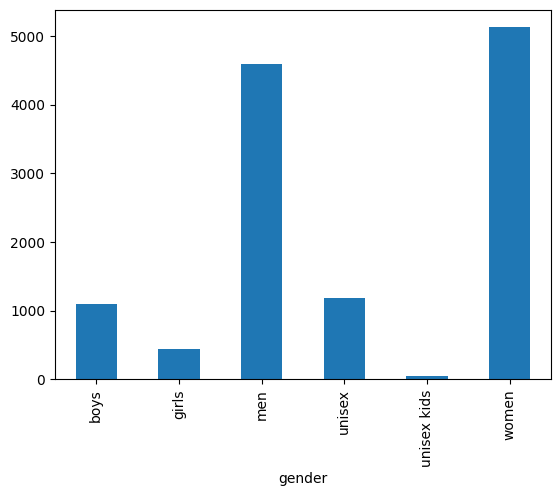

In [34]:
df.groupby('gender')['price'].count().plot.bar()

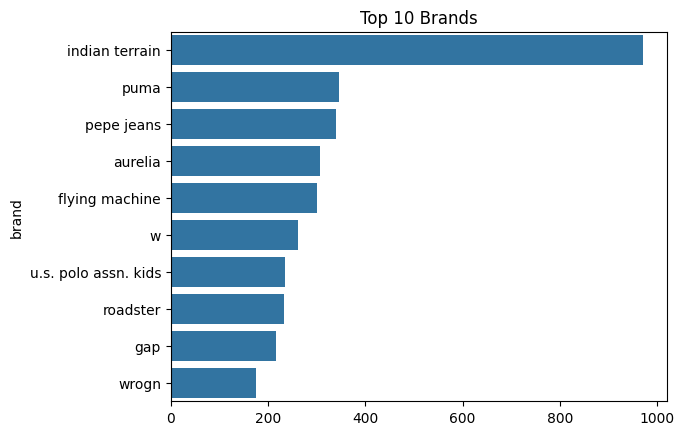

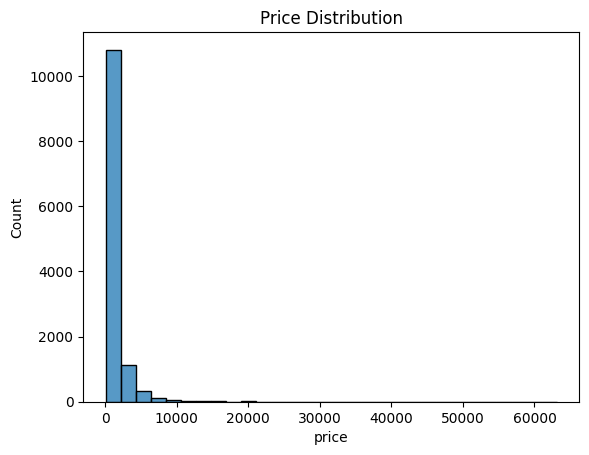

In [35]:
# Top brands
top_brands = df['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands")
plt.show()

# Price distribution
sns.histplot(df['price'], bins=30)
plt.title("Price Distribution")
plt.show()


In [36]:
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['description']).toarray()
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.28022535222008116
